<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px" width="50" height="50">

## Homework 2: Cleaning Rock Song Data

---


In [41]:
import pandas as pd
import numpy as np 
import seaborn as sns

%matplotlib inline

### 1. Load `rock.csv` and do an initial examination of its data columns.

In [42]:
rockfile = pd.read_csv('./datasets/rock.csv', sep=',')

In [43]:
# Load the data.

rockfile

,Song Clean,ARTIST CLEAN,Release Year,COMBINED,First?,Year?,PlayCount,F*G
0,Caught Up in You,.38 Special,1982,Caught Up in You by .38 Special,1,1,82,82
1,Fantasy Girl,.38 Special,NaN,Fantasy Girl by .38 Special,1,0,3,0
2,Hold On Loosely,.38 Special,1981,Hold On Loosely by .38 Special,1,1,85,85
3,Rockin' Into the Night,.38 Special,1980,Rockin' Into the Night by .38 Special,1,1,18,18
4,Art For Arts Sake,10cc,1975,Art For Arts Sake by 10cc,1,1,1,1
...,...,...,...,...,...,...,...,...
2225,She Loves My Automobile,ZZ Top,NaN,She Loves My Automobile by ZZ Top,1,0,1,0
2226,Tube Snake Boogie,ZZ Top,1981,Tube Snake Boogie by ZZ Top,1,1,32,32
2227,Tush,ZZ Top,1975,Tush by ZZ Top,1,1,109,109
2228,TV Dinners,ZZ Top,1983,TV Dinners by ZZ Top,1,1,1,1


In [44]:
# Look at the information regarding its columns.
rockfile.columns

Index(['Song Clean', 'ARTIST CLEAN', 'Release Year', 'COMBINED', 'First?',
       'Year?', 'PlayCount', 'F*G'],
      dtype='object')

### 2.  Clean up the column names.

Let's clean up the column names. There are two ways we can accomplish this:

#### 2.A Change the column names when you import the data using `pd.read_csv()`.

Notice that, when passing `names=[..A LIST OF STRING..]` with a number of columns that matches the number of strings in the passed list, you replace the column names.

NOTE: When you create custom column names, the first row of the `.csv` already represents a header. It is important to tell `pandas` to skip that row. The `skiprows=1` keyword argument to `read_csv()` will tell `pandas` to skip the first row.

In [45]:


# Change the column names when loading the '.csv':

rockfile = pd.read_csv('./datasets/rock.csv', skiprows=1, names=['song', 'artist','release', 'combined', 'first?', 'year?','play_count', 'f*g'],sep=',')

rockfile

,song,artist,release,combined,first?,year?,play_count,f*g
0,Caught Up in You,.38 Special,1982,Caught Up in You by .38 Special,1,1,82,82
1,Fantasy Girl,.38 Special,NaN,Fantasy Girl by .38 Special,1,0,3,0
2,Hold On Loosely,.38 Special,1981,Hold On Loosely by .38 Special,1,1,85,85
3,Rockin' Into the Night,.38 Special,1980,Rockin' Into the Night by .38 Special,1,1,18,18
4,Art For Arts Sake,10cc,1975,Art For Arts Sake by 10cc,1,1,1,1
...,...,...,...,...,...,...,...,...
2225,She Loves My Automobile,ZZ Top,NaN,She Loves My Automobile by ZZ Top,1,0,1,0
2226,Tube Snake Boogie,ZZ Top,1981,Tube Snake Boogie by ZZ Top,1,1,32,32
2227,Tush,ZZ Top,1975,Tush by ZZ Top,1,1,109,109
2228,TV Dinners,ZZ Top,1983,TV Dinners by ZZ Top,1,1,1,1


#### 2.B Change column names using the `.rename()` function.

The `.rename()` function takes an argument, `columns=name_dict`, in which `name_dict` is a dictionary containing the original column names as keys and the new column names as values.

In [46]:
# Change the column names using the `.rename()` function.

name_dict={'Song Clean':'song', 'ARTIST CLEAN':'artist', 'Release Year':'release', 'COMBINED':'combined', 'First?':'is_first',
       'Year?':'is_year', 'PlayCount':'play_count', 'F*G':'f_g'}

rockfile = pd.read_csv('./datasets/rock.csv')

rockfile = rockfile.rename(columns = name_dict)

rockfile

,song,artist,release,combined,is_first,is_year,play_count,f_g
0,Caught Up in You,.38 Special,1982,Caught Up in You by .38 Special,1,1,82,82
1,Fantasy Girl,.38 Special,NaN,Fantasy Girl by .38 Special,1,0,3,0
2,Hold On Loosely,.38 Special,1981,Hold On Loosely by .38 Special,1,1,85,85
3,Rockin' Into the Night,.38 Special,1980,Rockin' Into the Night by .38 Special,1,1,18,18
4,Art For Arts Sake,10cc,1975,Art For Arts Sake by 10cc,1,1,1,1
...,...,...,...,...,...,...,...,...
2225,She Loves My Automobile,ZZ Top,NaN,She Loves My Automobile by ZZ Top,1,0,1,0
2226,Tube Snake Boogie,ZZ Top,1981,Tube Snake Boogie by ZZ Top,1,1,32,32
2227,Tush,ZZ Top,1975,Tush by ZZ Top,1,1,109,109
2228,TV Dinners,ZZ Top,1983,TV Dinners by ZZ Top,1,1,1,1


#### 2.C Reassigning the `.columns` attribute of a DataFrame.

You can also just reassign the `.columns` attribute to a list of strings containing the new column names. 

The only caveat with reassigning `.columns` is that you have to reassign all of the column names at once. You can't partially replace a value by working on `.columns` directly. You have to reassign `.columns` with a list of equal length. 

In [47]:
# Replace the column names by reassigning the `.columns` attribute.

rockfile.columns = ['song', 'artist','release', 'combined', 'is_first', 'is_year','play_count','f*g']

rockfile

,song,artist,release,combined,is_first,is_year,play_count,f*g
0,Caught Up in You,.38 Special,1982,Caught Up in You by .38 Special,1,1,82,82
1,Fantasy Girl,.38 Special,NaN,Fantasy Girl by .38 Special,1,0,3,0
2,Hold On Loosely,.38 Special,1981,Hold On Loosely by .38 Special,1,1,85,85
3,Rockin' Into the Night,.38 Special,1980,Rockin' Into the Night by .38 Special,1,1,18,18
4,Art For Arts Sake,10cc,1975,Art For Arts Sake by 10cc,1,1,1,1
...,...,...,...,...,...,...,...,...
2225,She Loves My Automobile,ZZ Top,NaN,She Loves My Automobile by ZZ Top,1,0,1,0
2226,Tube Snake Boogie,ZZ Top,1981,Tube Snake Boogie by ZZ Top,1,1,32,32
2227,Tush,ZZ Top,1975,Tush by ZZ Top,1,1,109,109
2228,TV Dinners,ZZ Top,1983,TV Dinners by ZZ Top,1,1,1,1


### 3. Subsetting data where null values exist.

We have mixed `str` and `NaN` values in the `release` column. `NaN` stands for "not a number" and is the way `pandas` handles "nulls" or nonexistent data. We can use the `.isnull()` method of a Series to find null values.

Print the header of the data subset to where the `release` column is null values.

In [48]:
# Show records where df['release'] is null

rockfile.release.isnull().head(5)

0    False
1     True
2    False
3    False
4    False
Name: release, dtype: bool

### 4. Update slices of your DataFrame based on mask selection/slices.

In many scenarios, we want to upate values in our DataFrame according to criteria. Let's say we wanted to set all of the null values in `release` to 0.

With newer versions of `pandas`, in order to manipulate data in the original DataFrame, we have to use `.loc` while performing reassignment using a mask and an index.

For example, the following won't always work:
```python
df[row_mask]['column_name'] = new_value
```

The best way to accomplish the same task is:
```python
df.loc[row_mask, 'column_name'] = new_value
```

For multiple column assignment, you would use:
```python
df.loc[row_mask, ['col_1', 'col_2', 'col_3']] = new_value
```

#### 4.A Let's try it out. Make all of the null values in `release` 0.

In [49]:
# Replace release nulls with 0

rockfile.release = rockfile.release.fillna(0)

#### 4.B Verify that `release` contains no null values.

In [50]:
# A:
rockfile.release.isnull().value_counts()

False    2230
Name: release, dtype: int64

### 5. Ensure that the data types of the columns make sense. 

Verifying column data types is a critical part of data munging. If columns have the wrong data type, then there is usually corrupted or incorrect data in some of the observations.

#### 5.A Look at the data types for the columns. Are any incorrect given what the data represents?

In [51]:
# A:

rockfile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   song        2230 non-null   object
 1   artist      2230 non-null   object
 2   release     2230 non-null   object
 3   combined    2230 non-null   object
 4   is_first    2230 non-null   int64 
 5   is_year     2230 non-null   int64 
 6   play_count  2230 non-null   int64 
 7   f*g         2230 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 139.5+ KB


### 6. Investigate and clean up the `release` column.

The `release` column is a string data type when it should be an integer.

#### 6.A Figure out what value(s) are causing the `release` column to be encoded as a string instead of an integer.

In [52]:
# A:

rockfile.release.unique()

array(['1982', 0, '1981', '1980', '1975', '2000', '2002', '1992', '1985',
       '1993', '1976', '1995', '1979', '1984', '1977', '1990', '1986',
       '1974', '2014', '1987', '1973', '2001', '1989', '1997', '1971',
       '1972', '1994', '1970', '1966', '1965', '1983', '1955', '1978',
       '1969', '1999', '1968', '1988', '1962', '2007', '1967', '1958',
       '1071', '1996', '1991', '2005', '2011', '2004', '2012', '2003',
       '1998', '2008', '1964', '2013', '2006', 'SONGFACTS.COM', '1963',
       '1961'], dtype=object)

#### 6.B Look at the rows in which there is incorrect data in the `release` column.

In [53]:
# A:

rockfile.loc[rockfile['release'] == 'SONGFACTS.COM']

,song,artist,release,combined,is_first,is_year,play_count,f*g
1504,Bullfrog Blues,Rory Gallagher,SONGFACTS.COM,Bullfrog Blues by Rory Gallagher,1,1,1,1


#### 6.C. Clean up the data. Normally we may replace the offending data with null np.nan values, however we previously converted all of the nan values in the release column to zeros so we might as well continue with the same practice. Replacing with 0 (or nan) will allow us to convert the column to numeric.

In [54]:
# A:

rockfile['release'].replace({'SONGFACTS.COM': 0})

rockfile['release'] = rockfile['release'].replace({'SONGFACTS.COM': 0})

rockfile['release'] = pd.to_numeric(rockfile['release'])

### 7. Get summary statistics for the `release` column using the `.describe()` function.

Now that the `release` column is finally a numeric data type, we can apply the `.describe()` function.  

#### 7.A Print out the summary stats for the `release` column. What is the earliest and latest release date?

In [55]:
# A:

rockfile.release = rockfile.release.replace(0, np.nan)

rockfile.describe()

,release,is_first,is_year,play_count,f*g
count,1652.000000,2230.0,2230.000000,2230.000000,2230.000000
mean,1978.019976,1.0,0.741256,16.872646,15.048430
std,24.191247,0.0,0.438043,25.302972,25.288366
min,1071.000000,1.0,0.000000,0.000000,0.000000
25%,1971.000000,1.0,0.000000,1.000000,0.000000
50%,1977.000000,1.0,1.000000,4.000000,3.000000
75%,1984.000000,1.0,1.000000,21.000000,18.000000
max,2014.000000,1.0,1.000000,142.000000,142.000000


#### 7.B Based on the summary statistics, is there anything else wrong with the `release` column? 

<AxesSubplot:>

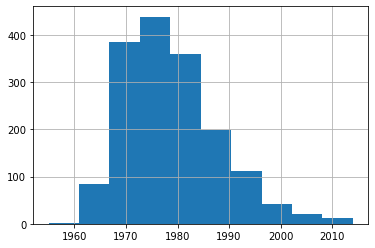

In [56]:
#yes - 1071 needs to be replaced.

rockfile['release'] = rockfile['release'].replace({1071: 0})

rockfile.release[rockfile.release > 0].hist()

_Looking at the DataFrame that contains the year 1071, we can see that the year was probably corrupted and should be replaced with something else if possible._

### 8. Make changes and investigate using custom functions with `.apply()`.

Let's say we want to traverse every single row in our data set and apply a function to that row.

#### 8.A Write a function that will take a row of a DataFrame and print out the song, artist, and whether or not the release date is < 1970.


In [57]:
# A:

# Series.apply(func) applies 'func' to each value in the series and returns a new series

#for the given row, validate song and artist, then return whether the date is before or after 1970
def song_art_date(row):
    song = row['song'] if row['song'] else '<Unknown Song>'
    artist = row['artist'] if row['artist'] else '<Unknown Artist>'
    release_date = row['release'] if row['release'] < 1970 else 'after 1970'
    return f'{song}, {artist}, {release_date}'

#### 8.B Using the `.apply()` function, apply the function you wrote to the first four rows of the DataFrame.

You will need to tell the `apply` function to operate row by row. Setting the keyword argument as `axis=1` indicates that the function should be applied to each row individually.

In [58]:
rockfile.apply(song_art_date, axis=1).head(4)

0          Caught Up in You, .38 Special, after 1970
1              Fantasy Girl, .38 Special, after 1970
2           Hold On Loosely, .38 Special, after 1970
3    Rockin' Into the Night, .38 Special, after 1970
dtype: object

You'll notice that there will be a final output Series of `None` values. The `.apply()` function, if a return value is not specified, will return a Series of `None` values (similar to how the default return for Python functions is `None` when a return statement is not specified).

### 9. Write a function that converts cells in a DataFrame to float and otherwise replaces them with `np.nan`.

If applied to our data, it would keep only the numeric information and otherwise input null values.

Recall that the try-except syntax in Python is a great way to try something and take another action if the initial step fails:

```python
try:
    Perform some action.
except:
   Perform some other action if the first failed with an error.
```

#### 9.A Write the function that takes a column and converts all of its values to float if possible and `np.nan` otherwise. The return value should be the converted Series.

In [38]:
# A:

#create empty list, then populate it with the float value for each entry in the column, or NaN if value can't be converted to float
def make_float(col):
    new_series = []
    for val in col:
        try:
            new_series.append(float(val))
        except:
            new_series.append(np.nan)
    return pd.Series(new_series)

make_float(rockfile.release)

0       1982.0
1          NaN
2       1981.0
3       1980.0
4       1975.0
         ...  
2225       NaN
2226    1981.0
2227    1975.0
2228    1983.0
2229    1973.0
Length: 2230, dtype: float64

In [68]:
rockfile.apply(lambda col: pd.to_numeric(col, errors='coerce', downcast='float'))

,song,artist,release,combined,is_first,is_year,play_count,f*g
0,NaN,NaN,1982.0,NaN,1.0,1.0,82.0,82.0
1,NaN,NaN,NaN,NaN,1.0,0.0,3.0,0.0
2,NaN,NaN,1981.0,NaN,1.0,1.0,85.0,85.0
3,NaN,NaN,1980.0,NaN,1.0,1.0,18.0,18.0
4,NaN,NaN,1975.0,NaN,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
2225,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0
2226,NaN,NaN,1981.0,NaN,1.0,1.0,32.0,32.0
2227,NaN,NaN,1975.0,NaN,1.0,1.0,109.0,109.0
2228,NaN,NaN,1983.0,NaN,1.0,1.0,1.0,1.0


#### 9.B Try your function out on the rock song data and ensure the output is what you expected.


In [39]:

rockfile = rockfile.apply(make_float)

#### 9.C Describe the new float-only DataFrame.

In [40]:
rockfile.describe()


,song,artist,release,combined,is_first,is_year,play_count,f*g
count,2.000000,0.0,1652.000000,0.0,2230.0,2230.000000,2230.000000,2230.000000
mean,1012.000000,NaN,1977.371671,NaN,1.0,0.741256,16.872646,15.048430
std,1367.544515,NaN,49.561223,NaN,0.0,0.438043,25.302972,25.288366
min,45.000000,NaN,0.000000,NaN,1.0,0.000000,0.000000,0.000000
25%,528.500000,NaN,1971.000000,NaN,1.0,0.000000,1.000000,0.000000
50%,1012.000000,NaN,1977.000000,NaN,1.0,1.000000,4.000000,3.000000
75%,1495.500000,NaN,1984.000000,NaN,1.0,1.000000,21.000000,18.000000
max,1979.000000,NaN,2014.000000,NaN,1.0,1.000000,142.000000,142.000000
